# Neural Encoding Simulation Toolkit | In silico fMRI Data Tutorial

In this tutorial you will familiarize with the [Neural Encoding Simulation Toolkit (NEST)][nest], consisting of trained encoding models of the brain that you can use to generate of in silico neural responses to stimuli of your choice. Through the [`NEST` Python package][github], you will use these trained encoding models to generate fMRI responses to images.

For more information on NEST refer to the [data manual][data_manual]. The code used to create NEST, along with its utility functions, is available on [GitHub][github].

You can run this tutorial either on [Colab][colab], or on [Jupyter Notebook][jupyter]. If you experience problems with the code, please get in touch with Ale (alessandro.gifford@gmail.com).

If you use the code and/or data from this tutorial, please cite:

> *Gifford AT, Bersch D, Roig G, Cichy RM. 2025. The Neural Encoding Simulation Toolkit. In preparation. https://github.com/gifale95/NEST*

[nest]: https://www.alegifford.com/projects/nest/
[data_manual]: https://docs.google.com/document/d/1DeQwjq96pTkPEnqv7V6q9g_NTHCjc6aYr6y3wPlwgDE/edit?usp=drive_link
[github]: https://github.com/gifale95/NEST
[colab]: https://colab.research.google.com/drive/1W9Sroz2Y0eTYfyhVrAJwe50GGHHAGBdE?usp=sharing
[jupyter]: https://github.com/gifale95/NEST/blob/main/tutorials/nest_fmri_tutorial.ipynb

---
---

# 0 | Configuration

Note that in sections `0.1 Install and import the necessary Python libraries` and `0.2 Access NEST` you will have to run different code cells based on whether you are running the tutorial on Colab or on Jupyter Notebook. An `if statement` will take care of this. You only need to select `'colab'` or `'jupyter_notebook'` for the `platform` variable below.

In [ ]:
# Select platform
platform = 'colab' #@param ['colab', 'jupyter_notebook']

## 0.1 | Install and import the necessary Python libraries

### 0.1.1 | Install libraries, Google Colab

If you are running the tutorial on Google Colab, you just need to install the [NEST Python package][nest_git].

[nest_git]: https://github.com/gifale95/NEST

In [ ]:
!pip install -U git+https://github.com/gifale95/NEST.git

### 0.1.2 | Install libraries, Jupyter Notebook

If you are running the tutorial on Jupyter Notebook, you need to install the following libraries before running the tutorial:

[h5py][h5py], [jupyter][jupyter], [matplotlib][matplotlib], [nest][nest_git], [nibabel][nibabel], [numpy][numpy], [pillow][pil], [torchvision][torchvision], [tqdm][tqdm].

[h5py]: https://docs.h5py.org/en/stable/
[jupyter]: https://jupyter.org/
[matplotlib]: https://matplotlib.org/stable/index.html
[nest_git]: https://github.com/gifale95/NEST
[nibabel]: https://nipy.org/nibabel/
[numpy]: https://numpy.org/
[pil]: https://pypi.org/project/pillow/
[torchvision]: https://pytorch.org/vision/stable/index.html
[tqdm]: https://tqdm.github.io/

### 0.1.3 | Import the libraries

Once you have installed all necessary libraries, import them with the following code.

In [35]:
import h5py
import matplotlib
from matplotlib import pyplot as plt
from nest import NEST
import nibabel as nib
import numpy as np
import os
from PIL import Image
import torchvision
from torchvision import transforms as trn
from tqdm import tqdm

---

## 0.2 | Access NEST

### 0.2.1 | Access NEST on Google Colab

If you are running the tutorial on Google Colab you can use NEST from the Google Drive public folder called [`neural_encoding_simulation_toolkit`][nest]. Before running the tutorial code you need to right-click on this folder, and select `Organise` → `Add shortcut`. This will create a shortcut (without copying or taking space) of the folder to a desired path in your Google Drive, from which you can read the content after mounting using `drive.mount()`. Finally, edit the `nest_dir` variable below with the path on your Drive to the `neural_encoding_simulation_toolkit` shortcut folder.

<font color='red'><b>NOTE:</b></font> **You need to manually create the data shortcut yourself, as the code cell below won't do this for you.**

[nest]: https://forms.gle/ZKxEcjBmdYL6zdrg9

In [ ]:
if platform == 'colab':
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    nest_dir = '/content/drive/MyDrive/neural_encoding_simulation_toolkit' #@param {type:"string"}

### 0.2.2 | Access NEST on Jupyter Notebook

If you are running the tutorial on Jupyter Notebook you first need to download NEST from the public Google Drive folder [`neural_encoding_simulation_toolkit`][data], and then edit the `nest_dir` variable below with the path to the downloaded and unzipped data folder.

Note that the `neural_encoding_simulation_toolkit` folder contains several GBs of data, and thus the download might take a while. However, based on your needs you might choose to download only a part of it. [NEST's data manual][nest_manual] provides a detailed description of NEST's content, which will help you in this choice.

We recommend downloading NEST directly from Google Drive via terminal using [Rclone][rclone]. [Here][guide] is a step-by-step guide for how to install and use Rclone to move files to and from your Google Drive. Before downloading NEST via terminal you need to add a shortcut of the `neural_encoding_simulation_toolkit` folder to your Google Drive. You can do this by right-clicking on the `neural_encoding_simulation_toolkit` folder, and selecting `Organise` → `Add shortcut`. This will create a shortcut (without copying or taking space) of the folder to a desired path in your Google Drive, from which you can download its content.

[data]: https://forms.gle/ZKxEcjBmdYL6zdrg9
[nest_manual]: https://docs.google.com/document/d/1DeQwjq96pTkPEnqv7V6q9g_NTHCjc6aYr6y3wPlwgDE/edit#heading=h.n2idexbb49xj
[rclone]: https://rclone.org/
[guide]: https://noisyneuron.github.io/nyu-hpc/transfer.html

In [ ]:
if platform == 'jupyter_notebook':
    nest_dir = '../neural_encoding_simulation_toolkit'

---
---

# 1 | Initialize NEST

## 1.1 | Create the NEST object

To use the NEST package, you first need to create a `NEST` object, providing the path to the Neural Encoding Simulation Toolkit directory. This object will be the instance through which you can generate in-silico brain responses.

In [36]:
# Initialize the NEST object with the path to the toolkit directory
nest_object = NEST(nest_dir)

## 1.2 | Browse the available encoding models

Let's explore what's available in the NEST toolkit. Each model has a unique ID with a naming pattern `modality_dataset_model`.




In [37]:
# List all available models and their versions
available_models = nest_object.list_models()
print(f"Available models: {available_models}")

Available models: ['fmri_nsd_fwrf', 'eeg_things_eeg_2_vit_b_32']


You can also view the modalities and datasets in a more structured format:

In [38]:
# Get a hierarchical view of available models by modality and dataset
catalog = nest_object.get_model_catalog(print_format=True)
print(f"Model Catalog as Dict: {catalog}")

Available Modalities and Datasets:
• EEG
  └─ things_eeg_2

• FMRI
  └─ NSD

Model Catalog as Dict: {'fmri': ['NSD'], 'eeg': ['things_eeg_2']}


The `print_format=True` parameter displays a nicely formatted hierarchical view in the console, making it easy to browse what's available.

## 1.3 | Detailed model information for selected models

For this tutorial, we'll focus on the fMRI model that uses **feature-weighted receptive fields (fwRF)**. Let's get comprehensive information about what this model does and how to use it with `.describe()`:

In [39]:
# Get comprehensive information about the fMRI model
model_id = "fmri_nsd_fwrf"  
model_info = nest_object.describe(model_id)

🧠 Model: fmri_nsd_fwrf

Modality: fmri
Dataset: NSD
Features: feature-weighted receptive fields (fwrf)
Repeats: single
Subject specific: True

📋 Description:
This model generates in silico fMRI responses to visual stimuli using feature-
weighted receptive fields (fwrf). It was trained on the Natural Scenes Dataset
(NSD), a large-scale 7T fMRI dataset of subjects viewing natural images. The
model extracts visual features using a convolutional neural network and maps
these features to brain activity  patterns across multiple visual regions of
interest (ROIs).  The model takes as input a batch of RGB images in the shape
[batch_size, 3, height, width], with pixel values ranging from 0 to 255 and
square dimensions (e.g., 224×224).

📥 Input:
  Type: numpy.ndarray
  Shape: ['batch_size', 3, 'height', 'width']
  Description: The input should be a batch of RGB images.
  Constraints:
    • Image values should be integers in range [0, 255]
    • Image dimensions (height, width) should be equal (s

The `describe()` function provides all the essential information needed to work with the model, including:

* **Basic Information:** Details about the modality (fMRI), dataset (NSD), and features (fwRF)
* **Description:** How the model works and what it does
* **Input Requirements:** Format specifications for images (dimensions, type, etc.)
* **Output Format:** The structure and meaning of the model's predictions
* **Parameters:** Required and optional arguments for functions like `get_encoding_model()`
* **Performance Information:** Metrics on how well the model performs
* **Usage Examples:** Code snippets showing how to use the model

This information will help you understand how to properly set up and use the model in the following sections.

---
---

# 2 | Generate in silico fMRI responses to images

Now we'll use NEST to generate predicted fMRI responses to visual stimuli.

## 2.1 | Load and prepare the images for which the in silico fMRI responses are generated

The `fmri_nsd_fwrf` encoding models expect images in a specific format: a 4D numpy array with shape (Batch size × 3 RGB Channels × Width × Height) and integer values in the range [0, 255]. The images must also be square (equal width and height), so we'll center crop them during loading.

In [40]:
images_dir = os.path.join(nest_dir, 'nest_tutorials', 'tutorial_images')
images_list = os.listdir(images_dir)
images_list.sort()
    
images = []
for img in tqdm(images_list):
    img_dir = os.path.join(images_dir, img)
    img = Image.open(img_dir).convert('RGB')
    # Center crop the images to square format, and resize them
    transform = trn.Compose([
        trn.CenterCrop(min(img.size)),
        trn.Resize((227,227))
    ])
    img = transform(img)
    img = np.asarray(img)
    img = img.transpose(2,0,1)
    images.append(img)
images = np.asarray(images)

# Print the images dimensions
print('\n\nImages shape:')
print(images.shape)
print('(Batch size × 3 RGB Channels x Width x Height)')

100%|██████████| 100/100 [00:00<00:00, 256.43it/s]



Images shape:
(100, 3, 227, 227)
(Batch size × 3 RGB Channels x Width x Height)


Let's visualize one of the loaded images to ensure everything looks correct:

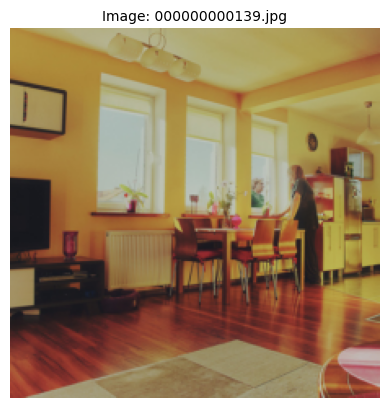

In [41]:
# Choose the image you would like to visualize
img_num = 0 # @param {type:"slider", min:0, max:99, step:1}

# Plot the image
plt.figure()
plt.axis('off')
plt.imshow(images[img_num].transpose(1,2,0))
plt.title('Image: ' + images_list[img_num], fontsize=10);

## 2.2 | Generate in silico fMRI responses to images

Now we'll generate predicted fMRI responses for our images. This is a two-step process:

1. First, we load a specific encoding model with `get_encoding_model()`
2. Then, we use `encode()` to generate predictions for our images

Let's set up the parameters for our model:

In [42]:
# Choose the model ID
model_id = "fmri_nsd_fwrf"

# Select the Subject number
subject = 1 # @param [1, 2, 3, 4, 5, 6, 7, 8] {type:"raw"}
print('Subject: ' + str(subject))

# Select the Region of Interest (ROI)
roi = "V1" # @param ["V1", "V2", "V3", "hV4", "EBA", "FBA-2", "OFA", "FFA-1", "FFA-2", "OPA", "PPA", "RSC", "OWFA", "VWFA-1", "VWFA-2", "mfs-words", "early", "midventral", "midlateral", "midparietal", "ventral", "lateral", "parietal"] {allow-input: true}
print('ROI: ' + roi)

Subject: 1
ROI: V1


The fMRI models are available for multiple brain regions, organized into functional categories and can be found in the `.describe()` function:

* **Early retinotopic visual regions:** V1, V2, V3, hV4.
* **Body-selective regions:** EBA, FBA-2.
* **Face-selective regions:** OFA, FFA-1, FFA-2.
* **Place-selective regions:** OPA, PPA, RSC.
* **Word-selective regions:** OWFA, VWFA-1, VWFA-2, mfs-words.
* **Anatomical streams:** early, midventral, midlateral, midparietal, ventral, lateral, parietal.

For more information on the NSD ROIs, please see the [NSD data manual][nsd_man].

> Note: The fMRI data used to train these models was z-scored during collection, so the generated in silico responses are also in z-scored space.

Now let's load the model and generate the fMRI responses:

[nsd_man]: https://cvnlab.slite.page/p/X_7BBMgghj/ROIs

In [43]:
# Step 1: Load the encoding model for our chosen subject and ROI
fmri_encoding_model = nest_object.get_encoding_model(
    model_id=model_id,
    subject=subject,
    roi=roi,
    device='auto'
)

# Step 2: Generate in silico fMRI responses for our images
insilico_fmri, insilico_fmri_metadata = nest_object.encode(
    fmri_encoding_model,
    images,
    return_metadata=True
)

Model loaded on cpu for subject 1, ROI V1


Encoding fMRI responses: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s, Encoded images=100, Total images=100]


Let's examine the shape of our results:

In [44]:
# Print the in silico fMRI data dimensions
print('In silico fMRI data shape:')
print(insilico_fmri.shape)
print('(Images × Voxels)')

In silico fMRI data shape:
(100, 1350)
(Images × Voxels)


The output is a 2D array where each row represents the predicted fMRI responses across all voxels in the selected ROI for a single image. The number of voxels varies by ROI and subject (for example, V1 in subject 1 has 1350 voxels).

# 3 | In silico fMRI responses metadata

The in silico fMRI responses come with useful metadata that helps us understand and analyze the results. You can access this metadata either by setting `return_metadata=True` in the `encode()` function (as we did above), or by using the `get_metadata()` method on the encoding model:

In [45]:
# Get metadata directly from the model
insilico_fmri_metadata = fmri_encoding_model.get_metadata()

The metadata is a dictionary with two main sections:

* **fmri:** Information about the fMRI data used to train the encoding models
* **encoding_models:** Information about the trained models themselves

## 3.1 | fMRI metadata

Here you will familiarize with the metadata from the `fmri` key, that is, metadata relative to the fMRI responses used to train the encoding models.

### 3.1.1 | Noise ceiling signal-to-noise ratio (ncsnr)

The noise ceiling signal-to-noise ratio (`ncsnr`) variable is a 1-D vector of length (Voxels), where each vector component indicates the signal-to-noise ratio score for a given voxel.

This value reflects the ratio between the signal and noise standard deviations of a given voxel, and can be used for example to select voxels with high signal-to-noise ratio, or discard voxels with low signal-to-noise ratio.

These ncsnr scores come unaltered from the Natural Scenes Dataset (NSD). For detailed information on how these scores were computed, see the [NSD paper][allen].

[allen]: https://doi.org/10.1038/s41593-021-00962-x

In [46]:
# Print the ncsnr shape
print('Noise ceiling signal-to-noise ratio (ncsnr) shape:')
print(insilico_fmri_metadata['fmri']['ncsnr'].shape)
print('(Voxels)')

Noise ceiling signal-to-noise ratio (ncsnr) shape:
(1350,)
(Voxels)


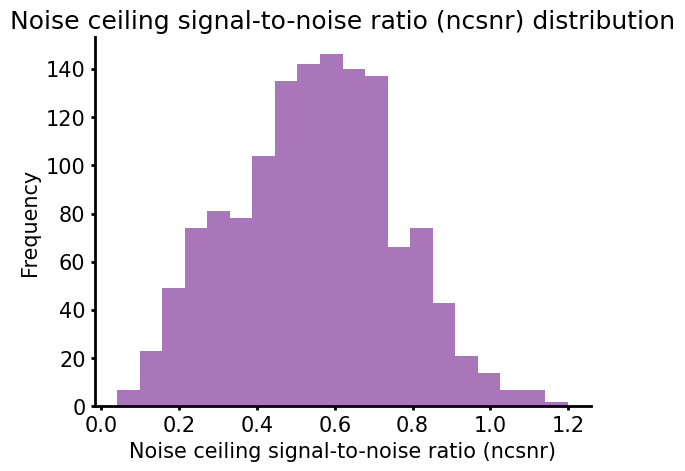

In [47]:
# Plot parameters
fontsize = 15
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.major.size'] = 3
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 3
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['lines.markersize'] = 3
colors = [(170/255, 118/255, 186/255)]

# Plot the ncsnr distribution using a histogram
plt.hist(insilico_fmri_metadata['fmri']['ncsnr'], bins=20, color=colors[0])
plt.title('Noise ceiling signal-to-noise ratio (ncsnr) distribution')
plt.xlabel('Noise ceiling signal-to-noise ratio (ncsnr)')
plt.ylabel('Frequency')
plt.show()

### 3.1.2 | Reshape the in silico fMRI responses to subject-native volume space

You can use the `roi_mask_volume` and `fmri_affine` variables to map the voxel responses of the selected subject and ROI back to 3-D subject-native volume space, and from there to a nifti image.

`roi_mask_volume` is a 3-D boolean matrix covering the entire fMRI acquisition volume space, with _True_ values indicating the voxels of the ROI of interest.

`fmri_affine` is the 4×4 fMRI volume transformation matrix.

In [48]:
# Reshape the in silico fMRI response back to subject-native volume space
sub_native_vol_space = []
# Loop over images
for fmri in insilico_fmri:
    vol_space = np.zeros(
        insilico_fmri_metadata['fmri']['roi_mask_volume'].shape)
    vol_space[insilico_fmri_metadata['fmri']['roi_mask_volume']] = fmri
    sub_native_vol_space.append(vol_space)
sub_native_vol_space = np.asarray(sub_native_vol_space)

print('Subject-native volume space shape:')
print(sub_native_vol_space.shape)
print('(Images × Voxels × Voxels × Voxels)')

# Convert the data into a nifti image
sub_native_vol_space_nii = nib.Nifti1Image(sub_native_vol_space,
    insilico_fmri_metadata['fmri']['fmri_affine'])

# You can then save the new nifti image using the following function:
# >>> nib.save(sub_native_vol_space_nii, 'sub_native_vol_space_nii.nii')

Subject-native volume space shape:
(100, 81, 104, 83)
(Images × Voxels × Voxels × Voxels)


## 3.2 | Encoding models metadata

Now you will familiarize with the metadata from the `encoding_models` key, that is, metadata relative to the trained fMRI encoding models.

### 3.2.1 | Encoding models encoding accuracy

First, you will plot the encoding accuracy of the encoding models for the selected subject and ROI.

For each NSD subject and ROI, one encoding models was trained using the (up to) 9000 non-shared images (i.e., the images uniquely seen by each subject during the NSD experiment), and tested them on 515 (out of 1000) shared images (i.e., the 515 images that each subject saw for exactly three times during the NSD experiment). We used the trained encoding models to generate in silico fMRI responses for the 515 test images, and compared these in silico responses to the ground truth (real) fMRI responses through a Pearson's correlation. We correlated ground-truth and in silico fMRI responses independently for each voxel (across the 515 test images), and squared the correlation scores resulting in one explained variance score (*r*²) for each voxel. Finally, we normalized the *r*² scores through division with the noise ceiling (i.e., the maximal explainable variance given the noise in the data), obtaining the noise-ceiling-normalized encoding accuracy for each voxel: this score indicates the percentage of explainable variance that has been accounted for by the encoding model.

You will first plot the noise-ceiling-normalized encoding accuracy (i.e., `explained_variance`) averaged across all voxels of the chosen ROI.

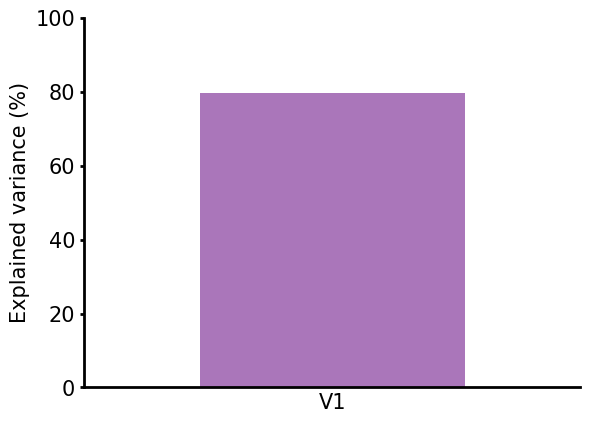

In [49]:
# Plot parameters
fontsize = 15
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.major.size'] = 3
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 3
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['lines.markersize'] = 3
colors = [(170/255, 118/255, 186/255)]

# Plot the mean noise-ceiling normalized encoding accuracy
encoding_acc = np.mean(insilico_fmri_metadata['encoding_models']\
    ['encoding_accuracy']['noise_normalized_encoding']) * 100
plt.plot()
plt.bar(1, encoding_acc, color=colors[0])
plt.ylabel('Explained variance (%)',
    fontsize=fontsize)
plt.ylim(bottom=0, top=100)
plt.xlabel(roi, fontsize=fontsize)
plt.xticks([])
plt.xlim(left=0.25, right=1.75);

Next, you will plot the voxel-wise encoding accuracy scores (`r²` scores) against the corresponding `noise_ceiling` scores, on a scatterplot.

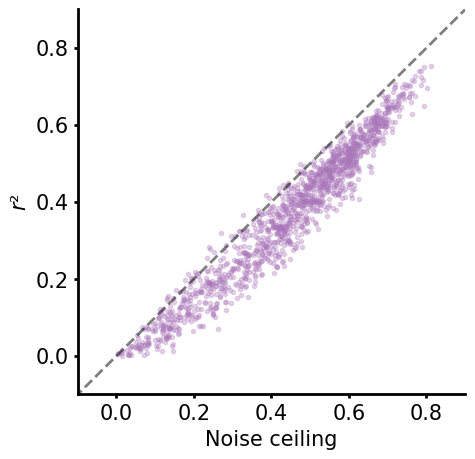

In [50]:
r2 = insilico_fmri_metadata['encoding_models']['encoding_accuracy']['r2']
noise_ceiling = insilico_fmri_metadata['encoding_models']['encoding_accuracy']\
    ['noise_ceiling']

plt.figure(figsize=(5,5))
plt.plot(np.arange(-1,1.1,.1), np.arange(-1,1.1,.1), '--k', linewidth=2,
    alpha=.5)
plt.scatter(noise_ceiling, r2, color=colors[0], alpha=.3)
plt.ylabel('$r$²', fontsize=fontsize)
plt.ylim(bottom=-.1, top=.9)
plt.xlabel('Noise ceiling', fontsize=fontsize)
plt.xlim(left=-.1, right=.9);

### 3.2.2 | Encoding models train/val/test split

Finally, here you will plot the NSD image IDs used to train (`train_img_num`), validate (`val_img_num`), and test (`test_img_num`) the encoding model for the chosen subject and ROI (the image IDs are zero-based, meaning that image ID "0" corresponds to the first NSD image.).

In [51]:
# Training image conditions
train_conditions = insilico_fmri_metadata\
    ['encoding_models']['train_val_test_nsd_image_splits']['train_img_num']
print('Training image condition number: ' + str(len(train_conditions)))
print('Training image conditions:')
print(train_conditions)

# Validation image conditions
val_conditions = insilico_fmri_metadata\
    ['encoding_models']['train_val_test_nsd_image_splits']['val_img_num']
print('\n\nValidation image condition number: ' + str(len(val_conditions)))
print('Validation image conditions:')
print(val_conditions)

# Test image conditions
test_conditions = insilico_fmri_metadata\
    ['encoding_models']['train_val_test_nsd_image_splits']['test_img_num']
print('\n\nTest image condition number: ' + str(len(test_conditions)))
print('Test image conditions:')
print(test_conditions)

Training image condition number: 9000
Training image conditions:
[ 2244 32051 19058 ... 19471 49507 11123]


Validation image condition number: 485
Validation image conditions:
[ 2950  2990  3146  3181  3386  3729  3951  4058  4129  4156  4325  4436
  4612  4768  4869  5106  5285  5427  5459  5502  5574  5714  5878  5890
  6132  6222  6514  6524  6558  6640  6713  7336  7409  7418  7480  7659
  7948  7954  8204  8262  8274  8318  8387  8415  8435  8465  8631  8843
  8925  9230  9462  9680  9722  9804  9847  9865  9978 10393 10507 10586
 10600 10610 10907 11487 11566 11827 12065 12075 12214 12487 12495 12634
 12685 12798 12937 13230 13653 13662 13720 13846 14110 14121 14165 14443
 14567 14644 14808 14931 15003 15025 15128 15492 15793 16063 16421 16466
 16635 16655 16723 16841 16865 16868 17230 17238 17369 17450 17463 17595
 17776 17794 17942 18268 18483 18505 18535 18690 18796 19200 19292 19573
 19642 19672 19690 20064 20223 20307 20702 20777 21197 21318 21508 21526
 21553 21703 21989 2